# Estimation d'un bien immobilier

Suite un projet réalisé au début d'année sur l'immobilier en France avec un DashBoard qui affiche les secteurs les plus chers et dans quel secteur il faudrait investir dans l'année à venir. Nous nous sommes rendu compte que le coût du loyer de la maison dépend de nombreux facteurs tels que; la taille de la maison, le nombre de chambres, la localité, le nombre de salles de bains, de couloirs et de cuisines, l'état de l'ameublement et bien plus encore. Dans ce rapport, grâce à l'utilisation d'algorithmes d'apprentissage automatique appropriés, nous essaierons de trouver la maison idéale en fonction des budgets et des préférences d'un client.

## Etat de l'art

Le premier article (#[[1]]) présente une étude comparative de sept algorithmes de machine learning pour la prédiction des loyers immobiliers : la régression, le Perceptron Multi-Couches, Random Forest, KNN, Apprentissage pondéré local, SMO et KStar. L'étude est menée sur un ensemble de données contenant 21 attributs internes tels que la surface, le prix, le nombre de chambres/salles de bain, le classement scolaire, etc., pour trois types de maisons : unifamiliales, en rangée et condos.

Le deuxième article (#[[2]]) propose LUCE, un modèle prédictif de valorisation immobilière basé sur l'apprentissage en continu. LUCE utilise un réseau de neurones pour extraire des informations abstraites à partir de données récentes de transactions immobilières. Les données sont organisées sous forme de graphe cubique où les nœuds représentent les entités immobilières et les attributs pertinents pour l'estimation de la valeur immobilière. Le modèle LUCE utilise également un réseau de mémoire à long terme (LSTM) pour modéliser les dépendances temporelles entre les données.

Le troisième article (#[[3]]) présente des techniques de régression avec l'aide de bibliothèques Python pour prédire le prix d'une maison. Le modèle considère des aspects plus raffinés tels que le modèle de notation immobilière et utilise des techniques graphiques et numériques pour évaluer les prix des maisons.

Le quatrième article (#[[4]]) utilise des approches de machine learning classiques ainsi que des modèles complexes pour prédire le prix des maisons. L'accent est mis sur la recherche des impacts des différents facteurs sur la prédiction des prix, y compris des facteurs tels que la localisation, la surface et la population.

Le cinquième article (#[[5]]) propose un modèle de prédiction de prix de maison basé sur l'apprentissage profond. Le modèle utilise l'optimiseur Adam et la fonction d'activation ReLU pour extraire les caractéristiques importantes de l'ensemble de données. Il utilise également le modèle ARIMA pour prévoir les tendances futures des prix immobiliers.

## Implémention

In [1]:
#import des modules nécessaires

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Chargement des données

L'ensemble de données utilisé dans ce projet provient d'un Dataset Kaggle. Il contient des informations sur environ 4700+ maisons disponibles à la location avec différents paramètres allant de; la taille au nombre de chambres, de halls et de cuisines à la localité, et le statut de l'ameublement.



In [2]:
df = pd.read_csv("data/House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


## Nettoyage et exploration des données

Après vérification, l'ensemble de données que nous disposons ne possède aucune veleur null ou de doublons. Cela montre que l'ensemble de données à déjà été nettoyé.

In [3]:
# Vérification si il y a des valeurs null ou des doublons
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Rent'].describe()

count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

Nous avons exploré les données pour vérifier s'il y a des tendances entre les variables explicatives et la variable cible.

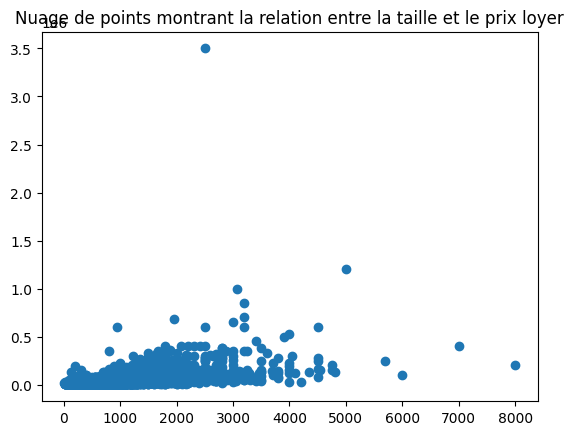

In [7]:
plt.scatter('Size', 'Rent', data=df)
plt.title("Nuage de points montrant la relation entre la taille et le prix loyer")
plt.show()

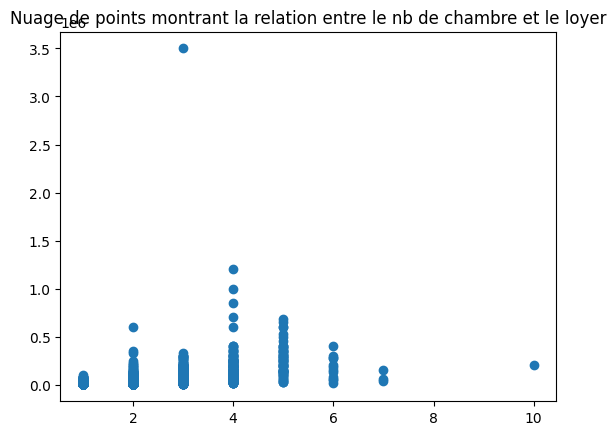

In [8]:
plt.scatter('Bathroom', 'Rent', data=df)
plt.title("Nuage de points montrant la relation entre le nb de chambre et le loyer")
plt.show()

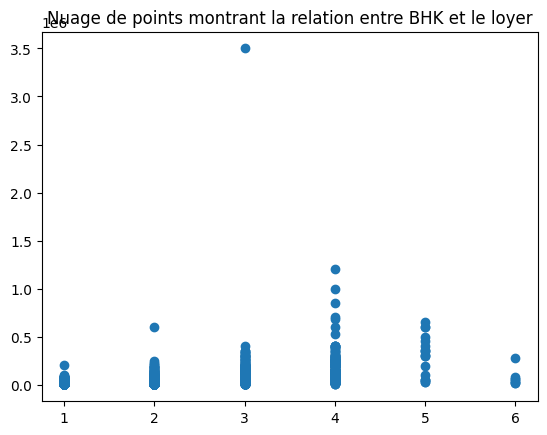

In [9]:
plt.scatter('BHK', 'Rent', data=df)
plt.title("Nuage de points montrant la relation entre BHK et le loyer")
plt.show()

In [10]:
rent_high = df.query('Rent == 3.5e+06')
rent_high

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1837,2022-06-08,3,3500000,2500,4 out of 4,Carpet Area,Marathahalli,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent


Nous remarquons une valeur atypique pour la variable cible mais nous ne la supprimons pas du dataset car il est possible d'avoir un loyer extrêmement élevé.

In [11]:
cat_cols = ['Floor', 'Area Type', 'Area Locality', 'City',
            'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
for col in cat_cols:
    print(df[col].value_counts())

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64
Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64
Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    

En vérifiant les types de données de la plupart des colonnes, nous remarquons que la plupart des fonctionnalités sont catégorielles. Cela conduit à l'étape suivante.

## Codage des fonctionnalités (Vectorisation)

Les champs catégoriels doivent être converties en champs numériques pour une modélisation efficace. Comme vu précèdement, nous pouvons étiquetter chaque champs, donc l'utilisation d'un one-hot encoding conduira probablement à une dimensionnalité élevée. Par conséquent, l'encodeur de Scikit-learn a été utilisé pour encoder les champs.

In [12]:
#Encodage des champs catégoriels en champs en champs numériques
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for cat_col in cat_cols:
    df[cat_col] = le.fit_transform(df[cat_col])

In [13]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,455,2,221,4,2,1,2,2
1,2022-05-13,2,20000,800,14,2,1527,4,1,1,1,2
2,2022-05-16,2,17000,1000,14,2,1760,4,1,1,1,2
3,2022-07-04,2,10000,800,10,2,526,4,2,1,1,2
4,2022-05-09,2,7500,850,10,1,1890,4,2,0,1,2


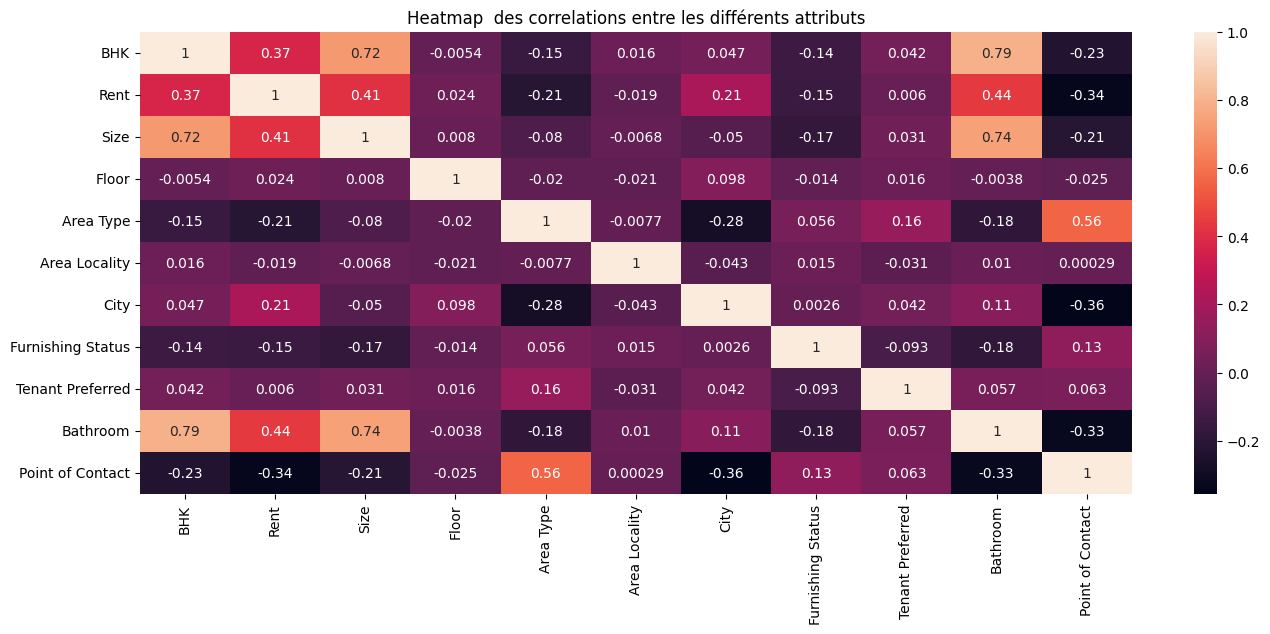

In [14]:
#correlations entre les différents attributs
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True)
plt.title("Heatmap  des correlations entre les différents attributs")
plt.show()

In [15]:
X = df.drop(['Posted On', 'Rent'], axis=1).values
Y = df['Rent'].values

In [16]:
X.shape

(4746, 10)

In [17]:
Y.shape

(4746,)

## Deux ensembles : train-test

L'ensemble de données est divisé en variables explicatives — X et variable cible — Y. Puis, divisé en données de train et de test dans un rapport de 70:30 respectivement. Le fractionnement des données permet d'évaluer les performances du modèle sur des données de test après avoir été entraîné sur les données d'entraînement. La division train-test de Scikit-learn est utilisée pour réalisé cette tâche.

## Pre-processing

Avant de passer à la modélisation, les données doivent être centrées réduites pour gérer les champs asymétriques. Le "standard scaler"  de Scikit-learn garantit que pour chaque champs, la moyenne est de 0 et la variance est de 1, ce qui ramène toutes les champs à la même mesure. Cela affectera considérablement les performances du modèle.

## La modélisation

La régression linéaire est une méthode de modélisation statistique utilisée pour prédire une variable de sortie en fonction d'une ou plusieurs variables d'entrée. La prévision des biens immobiliers est un problème de régression, c'est pourquoi quatre modèles de régression ont été entraînés et le meilleur a été choisi.

Lors de l'évaluation de la performance d'un modèle de régression linéaire, deux mesures couramment utilisées sont le score R2 et l'erreur quadratique moyenne (EQM).

Le score R2, également appelé coefficient de détermination, est une mesure de la proportion de la variance de la variable de sortie qui peut être expliquée par les variables d'entrée du modèle. Il est compris entre 0 et 1, où une valeur de 0 indique que le modèle n'explique aucune variance de la variable de sortie, tandis qu'une valeur de 1 indique que le modèle explique toute la variance de la variable de sortie. Plus précisément, le score R2 est calculé comme la proportion de la variance de la variable de sortie expliquée par le modèle, divisée par la variance totale de la variable de sortie. Ainsi, un score R2 élevé indique que le modèle est capable d'expliquer une grande partie de la variance de la variable de sortie.

L'erreur quadratique moyenne (EQM) est une mesure de la qualité de l'ajustement du modèle aux données. Elle mesure l'écart quadratique moyen entre les valeurs prédites par le modèle et les valeurs réelles de la variable de sortie. Plus précisément, l'EQM est calculée comme la moyenne des carrés des différences entre les valeurs prédites et les valeurs réelles de la variable de sortie. Une valeur d'EQM faible indique que le modèle a une bonne adéquation aux données, tandis qu'une valeur élevée indique que le modèle n'ajuste pas bien les données.

In [18]:
from sklearn.metrics import mean_squared_error


def eqm(ytest, ypred):
    result = np.sqrt(mean_squared_error(ytest, ypred))
    return result

In [19]:
def r2score(model):
    score = model.score(rescaledX_test, y_test)
    return score

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

## Linear regression

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(rescaledX_train, y_train)

LinearRegression()

In [23]:
y_pred_lr = lr.predict(rescaledX_test)

In [24]:
r2score(lr)

0.4769277942651481

In [25]:
eqm(y_test, y_pred_lr)

42905.400830172315

## Decision tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_split=30, max_depth=10)
tree.fit(rescaledX_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=30)

In [27]:
y_pred_tree = tree.predict(rescaledX_test)

r2score(tree)

0.651635488830794

In [28]:
eqm(y_test, y_pred_tree)

35014.513347753884

## Xgboost

## Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
boost = GradientBoostingRegressor(n_estimators=300, min_samples_split=20)
boost.fit(rescaledX_train, y_train)

GradientBoostingRegressor(min_samples_split=20, n_estimators=300)

In [30]:
y_pred_boost = boost.predict(rescaledX_test)

r2score(boost)

0.5983256783738763

In [31]:
eqm(y_test, y_pred_boost)

37598.29717280486

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=30, n_jobs=-1, random_state=0)
forest.fit(rescaledX_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=30, n_estimators=300,
                      n_jobs=-1, random_state=0)

In [33]:
y_pred_forest = forest.predict(rescaledX_test)

r2score(forest)

0.6805708834711577

In [34]:
eqm(y_test, y_pred_forest)

33528.82946312218

## Évaluation du modèle
Après un entrainement sur 4 modèles différents, nous pouvons voir que random forest s'est avéré être le meilleur modèle ayant le meilleur score R2 de 0,68 et le moins EQM d'environ 33530.

## Quels champs sont importants ?

Ensuite, nous déterminons les champs qui sont significativement importants en calculant le score d'importance des champs et en le visualisant. D'après le barplot ci-dessous, la surface de la maison, la ville où se trouve la maison et le nombre de salles de bains dans la maison déterminent de manière significative le loyer de la maison.

feature: 0, score: 0.00331
feature: 1, score: 0.42605
feature: 2, score: 0.00941
feature: 3, score: 0.00050
feature: 4, score: 0.00944
feature: 5, score: 0.19936
feature: 6, score: 0.00273
feature: 7, score: 0.00141
feature: 8, score: 0.32994
feature: 9, score: 0.01786


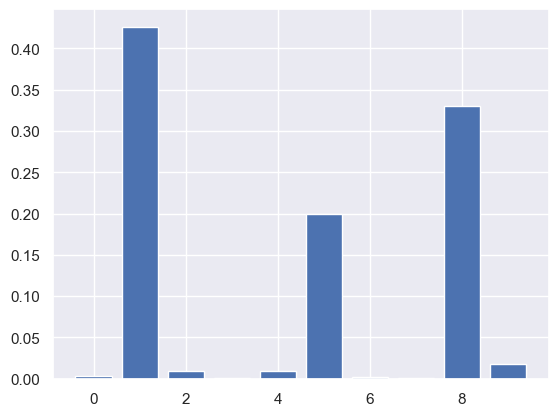

In [35]:
importance = forest.feature_importances_
for i, v in enumerate(importance):
    print('feature: %d, score: %.5f' %(i, v))
sns.set()
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## References
<a id="1">[1]</a>
Maryam Heidari;Samira Zad;Setareh Rafatirad; (2021).
Ensemble of Supervised and Unsupervised Learning Models to Predict a ProfitableBusiness Decision . 2021 IEEE International IOT, Electronics and Mechatronics Conference (AIMTRONICS), (), –.
doi:10.1109/iemtronics52119.2021.9422649

<a id="1">[2]</a>
Azme Bin Khamis, Nur K.K.B. Kamarudin. Compara-tive Study On
Estimate House Price Using Statistical And Neural Network Model.
International Journal of Scientific Technology Research 3.12 (2014):
126-131.

<a id="1">[3]</a>
Truong, Quang; Nguyen, Minh; Dang, Hy; Mei, Bo (2020).
Housing Price Prediction via Improved Machine Learning Techniques. Procedia
Computer Science, 174(), 433–442.

<a id="1">[4]</a>
Visit Limsombunchai, Christopher Gan, Minsoo Lee. House price prediction: hedonic price model vs. artificial neural network. New Zealand
Agricultural and Resource Economics Society Conference. (2004).